# **Esperanza de vida (OMS)**


In [289]:
# Importamos las librerías necesarias
import os # Para manejo de directorios y rutas
import numpy as np # Para cálculos numéricos eficientes
import pandas as pd # Para manipulación y análisis de datos
import matplotlib.pyplot as plt
import seaborn as sns #Para visualización de datos
from mpl_toolkits.mplot3d import Axes3D


# Configuración para mostrar gráficos en el notebook
%matplotlib inline

In [290]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [293]:
# Ruta del archivo en Google Drive (ajústala según la ubicación real)
file_path = "/content/gdrive/MyDrive/machine learning-2025/Ejercicios de practica/Regresion lienal/Life Expectancy Data.csv"

# Cargar datos con pandas
df = pd.read_csv(file_path, delimiter=",")
# Eliminar filas con valores nulos
#df = df.dropna()

# Verificar si hay filas restantes
#print(f"El dataset limpio tiene {df.shape[0]} filas y {df.shape[1]} columnas.")








df.fillna(0, inplace=True)  # Reemplazar valores NaN con 0











# Ver las primeras filas para inspeccionar la estructura
print("Primeras filas del dataset:")
print(df.head())

# Mostrar el número de filas y columnas
print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")


Primeras filas del dataset:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS       

In [294]:
# Ver tipos de datos en el dataset
print(df.dtypes)

# Ver valores únicos en las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("\nColumnas categóricas y sus valores únicos:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()[:5]} ...")  # Muestra solo los primeros 5 valores únicos


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Columnas categóricas y sus valores únic

In [295]:
from sklearn.preprocessing import LabelEncoder

# Codificar la columna "Status" con 0 y 1
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])

# Aplicar One-Hot Encoding a "Country"
# df = pd.get_dummies(df, columns=["Country"], drop_first=True)

# Ver las primeras filas después de la transformación
print(df.head())


       Country  Year  Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015       1              65.0            263.0   
1  Afghanistan  2014       1              59.9            271.0   
2  Afghanistan  2013       1              59.9            268.0   
3  Afghanistan  2012       1              59.5            272.0   
4  Afghanistan  2011       1              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16    

In [296]:
# Definir la variable dependiente (y) y las independientes (X)
y = df["Life expectancy "].values  # La variable a predecir

# Eliminar la columna "Life expectancy " y "Country" de X
X = df.drop(columns=["Life expectancy ", "Country"]).values
# Ver la forma de X e y
print(f"Dimensión de X: {X.shape}")
print(f"Dimensión de y: {y.shape}")


Dimensión de X: (2938, 20)
Dimensión de y: (2938,)


In [297]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [298]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.015e+03 1.000e+00 2.630e+02 ... 1.730e+01 4.790e-01 1.010e+01]
 [2.014e+03 1.000e+00 2.710e+02 ... 1.750e+01 4.760e-01 1.000e+01]
 [2.013e+03 1.000e+00 2.680e+02 ... 1.770e+01 4.700e-01 9.900e+00]
 ...
 [2.002e+03 1.000e+00 7.300e+01 ... 1.300e+00 4.270e-01 1.000e+01]
 [2.001e+03 1.000e+00 6.860e+02 ... 1.700e+00 4.270e-01 9.800e+00]
 [2.000e+03 1.000e+00 6.650e+02 ... 1.120e+01 4.340e-01 9.800e+00]]
Media calculada: [2.00751872e+03 8.25731790e-01 1.64235534e+02 3.03039483e+01
 4.29892784e+00 7.38251295e+02 6.57055820e+01 2.41959224e+03
 3.78777740e+01 4.20357386e+01 8.20163376e+01 5.48140572e+00
 8.17916950e+01 1.74210347e+00 6.34209142e+03 9.92315028e+06
 4.78369639e+00 4.81395507e+00 5.91880191e-01 1.13274336e+01]
Desviación estandar calculada: [4.61305567e+00 3.79339954e-01 1.24429912e+02 1.17906430e+02
 4.07905322e+00 1.98757652e+03 3.88716987e+01 1.14653208e+04
 2.03414572e+01 1.60418241e+02 2.42677038e+01 2.87457318e+00
 2.45399226e+01 5.07692030e+00 1.34072196e+04 5.4066653

In [299]:
# Añadir la columna de unos para el término de intersección (X0)
m = len(y)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# Verificar si se añadió correctamente
print(X[:5])  # Muestra las primeras 5 filas de X para comprobar



[[ 1.          1.6217623   0.45939851  0.79373572  0.26882378 -1.0514518
  -0.33557031 -0.01815156 -0.11038437 -0.92312826  0.25535912 -3.13240751
   0.93182331 -0.68426031 -0.3234448  -0.42945759  0.4404442   2.80646995
   2.7672287  -0.44954805 -0.28779894]
 [ 1.          1.40498625  0.45939851  0.85802894  0.28578638 -1.0514518
  -0.33444132 -0.09532853 -0.16812371 -0.9477086   0.27406024 -0.98964195
   0.93878086 -0.80651008 -0.3234448  -0.42733654 -0.17747665  2.87427926
   2.81155385 -0.46149562 -0.31124615]
 [ 1.          1.1882102   0.45939851  0.83391898  0.30274898 -1.0514518
  -0.33459444 -0.04387722 -0.17353132 -0.97228895  0.29276135 -0.82481383
   0.92138697 -0.72501023 -0.3234448  -0.42591578  0.40336393  2.91948547
   2.85587899 -0.48539076 -0.33469336]
 [ 1.          0.97143414  0.45939851  0.8660656   0.32819289 -1.0514518
  -0.33209644  0.03329975  0.03204514 -0.99686929  0.31769617 -0.61877868
   1.05705929 -0.60276046 -0.3234448  -0.42306553 -0.11515772  2.96469168

In [300]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [301]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Theta óptimo: [ 6.55596886e+01 -6.40179372e-02 -1.17546750e+00 -2.19925931e+00
  6.37460965e-02  7.61290013e-01  2.42231093e-01  3.29184769e-01
 -1.77265625e-01  1.02643368e+00 -2.44321212e-01  8.16534539e-01
 -2.49884075e-01  8.58537266e-01 -2.56303878e+00  5.10668907e-01
  1.48184319e-01 -2.62055827e-01 -1.68029408e-01  1.46262855e+00
  1.15036965e+00]
Historial de costos: [24.333981941443348, 24.321982166114257, 24.310006356722116, 24.298054465368768, 24.286126444251817, 24.27422224566446, 24.26234182199525, 24.250485125727884, 24.238652109441002, 24.22684272580811]


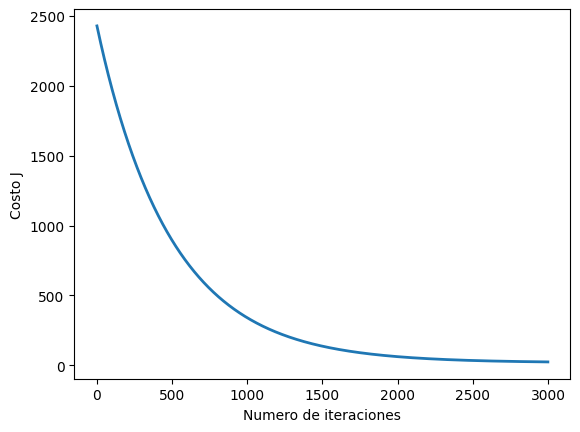

In [302]:
# Inicializar theta (por ejemplo, con ceros)
initial_theta = np.zeros(X.shape[1])

# Definir parámetros
alpha = 0.001  # Tasa de aprendizaje
num_iters = 3000  # Número de iteraciones

# Ejecutar el descenso por gradiente
theta_opt, J_history = gradientDescentMulti(X, y, initial_theta, alpha, num_iters)
# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Mostrar los resultados
print("Theta óptimo:", theta_opt)
print("Historial de costos:", J_history[-10:])  # Últimos 10 costos para ver la convergencia


In [303]:


# Datos de entrada para un país específico (por ejemplo, Afganistán, 2015)
X_array = np.array([
    2015, 1, 255, 55, 0.015, 73.5, 70, 1050, 20, 90, 5, 6.5, 70, 0.08, 620, 33000000, 16.5, 16.7, 0.480, 9.8
])

# Normalizar los datos usando mu y sigma
X_array_normalized = (X_array - mu) / sigma

# Agregar el término de sesgo (1) al principio de X_array_normalized
X_array_normalized = np.insert(X_array_normalized, 0, 1)

# Calcular la tasa de mortalidad (o lo que se quiera estimar, en este caso un valor como el precio)
tasa_mortalidad = np.dot(X_array_normalized, theta_opt)

# Mostrar el resultado
print('la esperanza de vida es: {:.2f}'.format(tasa_mortalidad))





la esperanza de vida es: 56.92


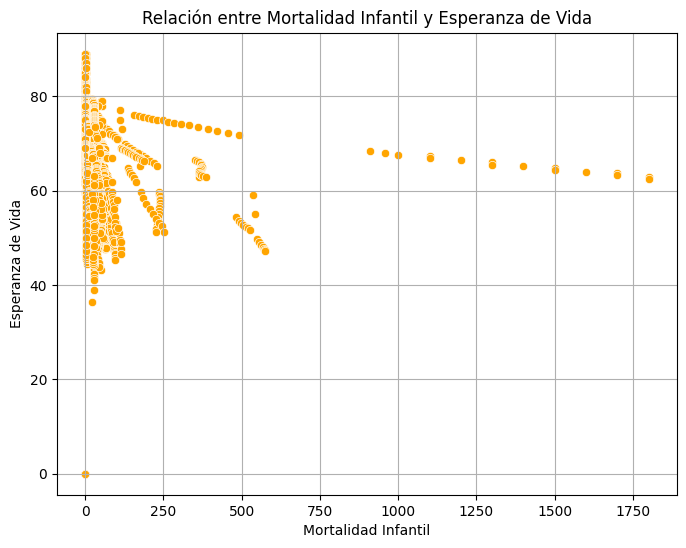

In [305]:
# Relación entre esperanza de vida y mortalidad infantil
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['infant deaths'], y=df['Life expectancy '], color='orange')
plt.xlabel('Mortalidad Infantil')
plt.ylabel('Esperanza de Vida')
plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida')
plt.grid(True)
plt.show()


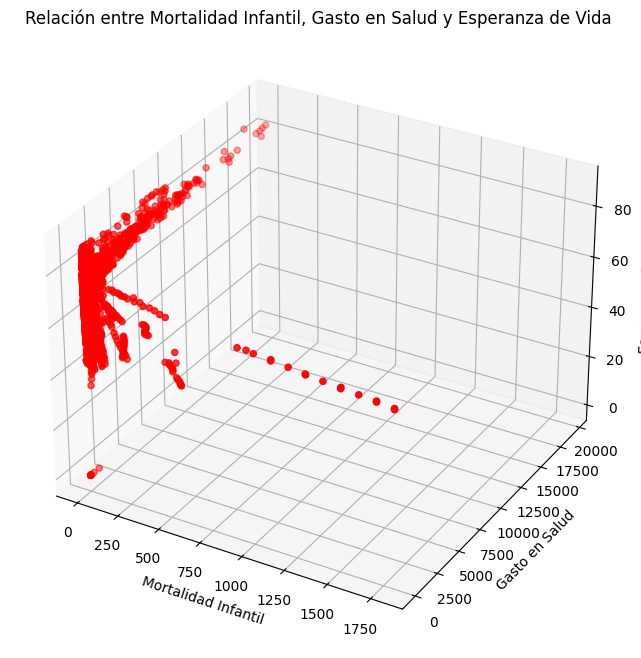

In [306]:
# Gráfico 3D para ver la relación entre mortalidad infantil, gasto en salud y esperanza de vida
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Datos de ejemplo: Mortalidad infantil, Gasto en Salud, Esperanza de Vida
ax.scatter(df['infant deaths'], df['percentage expenditure'], df['Life expectancy '], c='r', marker='o')

# Etiquetas
ax.set_xlabel('Mortalidad Infantil')
ax.set_ylabel('Gasto en Salud')
ax.set_zlabel('Esperanza de Vida')

plt.title('Relación entre Mortalidad Infantil, Gasto en Salud y Esperanza de Vida')
plt.show()


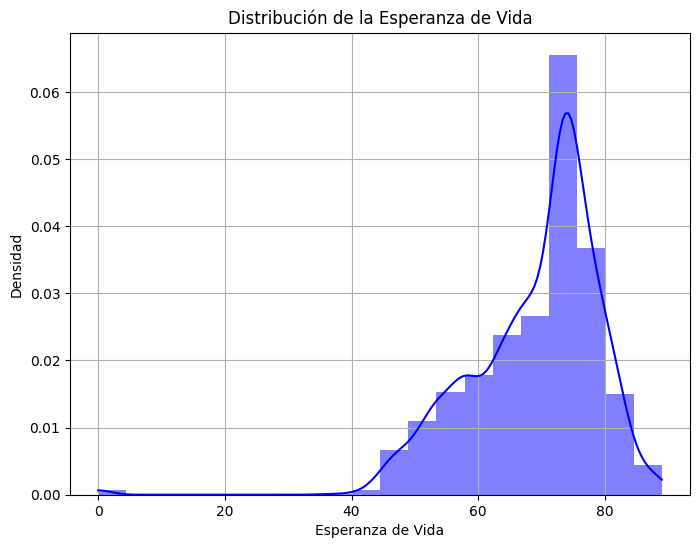

In [311]:
# Histograma de la Esperanza de Vida
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy '], bins=20, kde=True, color='blue', stat="density", linewidth=0)
plt.title('Distribución de la Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()



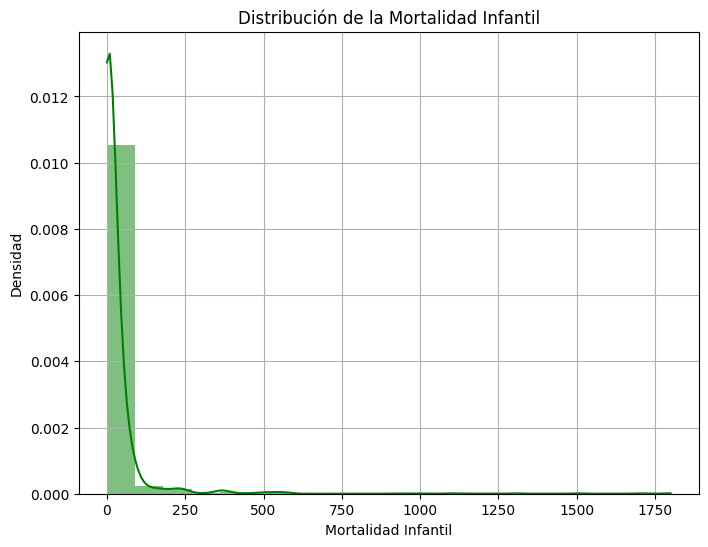

In [312]:
# Histograma de Mortalidad Infantil
plt.figure(figsize=(8, 6))
sns.histplot(df['infant deaths'], bins=20, kde=True, color='green', stat="density", linewidth=0)
plt.title('Distribución de la Mortalidad Infantil')
plt.xlabel('Mortalidad Infantil')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


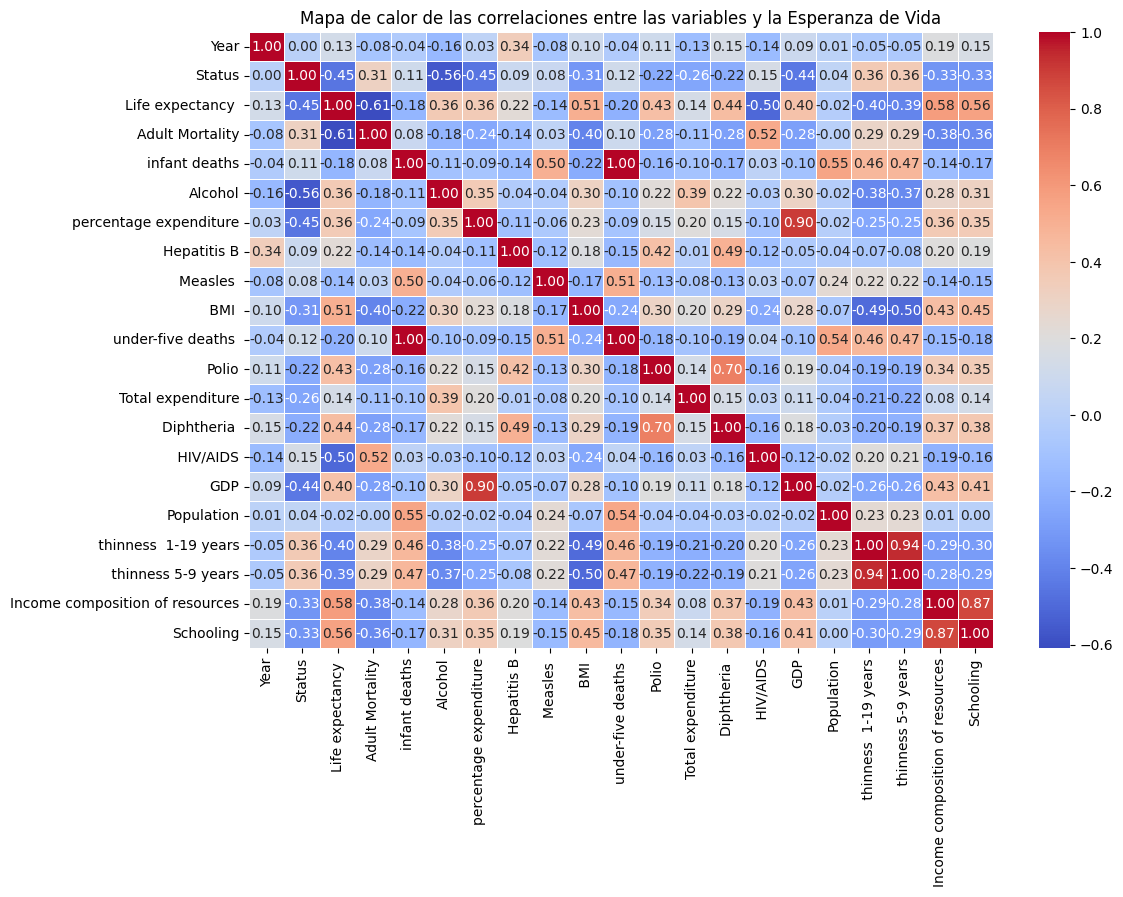

In [314]:
# Filtramos solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Eliminar filas con valores nulos antes de calcular la correlación
df_numeric = df_numeric.dropna()

# Crear un DataFrame con las correlaciones de todas las variables
correlation_matrix = df_numeric.corr()

# Crear un heatmap para ver las correlaciones entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de las correlaciones entre las variables y la Esperanza de Vida')
plt.show()
